# Logistic Regression
We will use the Iris data set (BSD license). The original data set contains 150 samples of Iris flowers that belong to one of three species (setosa, versicolor and virginica). We will change it into a binary classification problem by using only the first two types of flowers (setosa and versicolor). In addition, we will use only the first two features of each flower (sepal width and sepal length).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

np.random.seed(0)

In [2]:
iris = load_iris()
X = iris.data[:, :2]  # take only the first two features
y = iris.target

# take only the setosa and versicolor flowers
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

In [3]:
def plot_data(X, y):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], style=iris.target_names[y], 
                    palette=['r','b'], markers=('s','o'), edgecolor='k')
    
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend() 

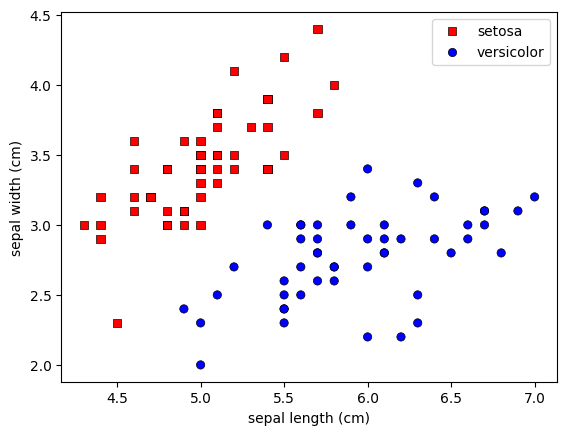

In [4]:
plot_data(X, y)

As can be seen, the data set is linearly separable, therefore logistic regression should be able to find the boundary between the two classes.

Next, we need to add a column of ones to the features matrix $X$ in order to represent the bias $(w_0)$:

In [5]:
# Add a column for the bias
n = X.shape[0] 
X_with_bias = np.hstack((np.ones((n, 1)), X))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, random_state=0)

## Model Implementation

In [7]:
def sigmoid(z):
    """ Compute the sigmoid of z (z can be a scalar or a vector). """
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, w):
    """ J, grad = cost_function(X, y, w) computes the cost of a logistic regression model 
        with parameters w and the gradient of the cost w.r.t. to the parameters. """
    
    # compute the cost
    p = sigmoid(X @ w)    
    J = -(1/n) * (y @ np.log(p) + (1-y) @ np.log(1-p)) 
    
    # compute the gradient    
    grad = (1/n) * X.T @ (p - y)  
    return J, grad

In [9]:
def optimize_model(X, y, alpha=0.01, max_iter=5000, tol=0.0001):
    """ Optimize the model using gradient descent.
        X, y: The training set        
        alpha: The learning rate
        max_iter: The maximum number of passes over the training set (epochs)
        tol: The stopping criterion. Training will stop when (new_cost > cost - tol)
    """
    w = np.random.rand(X.shape[1])
    cost, grad = cost_function(X, y, w)
    
    for i in range(max_iter):
        w = w - alpha * grad
        new_cost, grad = cost_function(X, y, w)        
        if new_cost > cost - tol:
            print(f'Converged after {i} iterations')
            return w, new_cost
        cost = new_cost
    
    print('Maximum number of iterations reached')
    return w, cost

Normally at this point you would have to normalize your data set, since gradient descent does not work well with features that have different scales. In our specific data set normalization is not necessary since the ranges of the two features are similar.

In [10]:
opt_w, cost = optimize_model(X_train, y_train)

print('opt_w:', opt_w)
print('Cost at opt_w:', cost)

Converged after 1323 iterations
opt_w: [ 0.26031859  0.80769812 -1.48135735]
Cost at opt_w: 0.28381840550408244


In [12]:
def predict(X, w):
    """ Predict whether the label is 0 or 1 for the samples in X using a threshold of 0.5
        (i.e., if sigmoid(X @ theta) >= 0.5, predict 1)
    """
    p = sigmoid(X @ w)
    y_pred = (p >= 0.5).astype(int)
    return y_pred

In [13]:
predict([[1, 6, 2], [1, 5.5, 3]], opt_w)

array([1, 1])

In [14]:
def evaluate_model(X, y, w):
    y_pred = predict(X, w)
    accuracy = np.mean(y == y_pred)
    return accuracy

In [15]:
train_accuracy = evaluate_model(X_train, y_train, opt_w)
print(f'Train accuracy: {train_accuracy * 100:.3f}%')

test_accuracy = evaluate_model(X_test, y_test, opt_w)
print(f'Test accuracy: {test_accuracy * 100:.3f}%')

Train accuracy: 98.667%
Test accuracy: 100.000%


In [16]:
def plot_decision_boundary(X, y, w):
    """ Plot the decision boundary between the classes """
    plot_data(X, y)
    
    line_x = np.array(plt.gca().get_xlim())
    line_y = -1 / w[2] * (w[1] * line_x + w[0])
    plt.plot(line_x, line_y, c='k', ls='--')

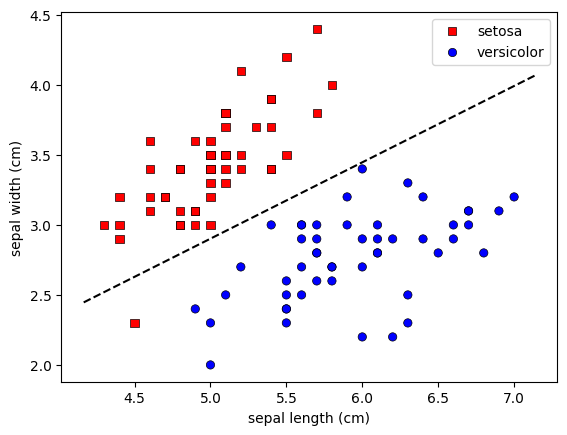

In [17]:
plot_decision_boundary(X, y, opt_w)

## The LogisticRegression Class in Scikit-Learn

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [24]:
train_accuracy = clf.score(X_train, y_train)
print(f'Train accuracy: {train_accuracy * 100:.3f}%')

test_accuracy = clf.score(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.3f}%')

Train accuracy: 100.000%
Test accuracy: 100.000%


In [25]:
print(clf.n_iter_)

[15]


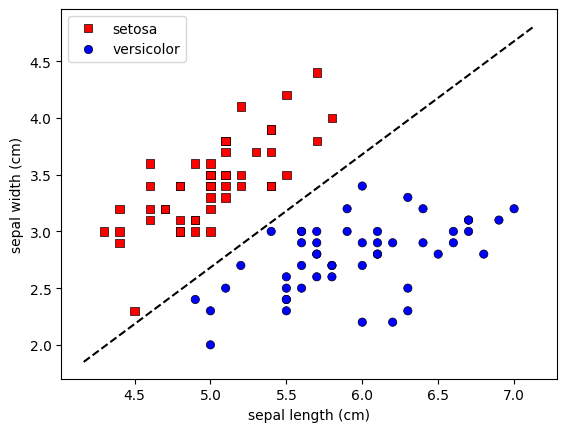

In [26]:
opt_w = np.insert(clf.coef_, 0, [clf.intercept_])
plot_decision_boundary(X, y, opt_w)